In [2]:
#face detector
#### Practice 

import cv2
import numpy as np
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture('Wiiplay.mp4')
scaling_factor = 1

hat = cv2.imread('hat.png', cv2.IMREAD_UNCHANGED)
height, width, channel = hat.shape

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=3)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
        # Alpha #
        head = frame[y:y+w, x:x+h, :]
        cv2.imshow('Head', head)
        hat = cv2.resize(hat, (w, h), 0, 0, interpolation=cv2.INTER_AREA)
        alpha_hat = hat[:,:,3]
        alpha_hat = alpha_hat/255
        alpha_hat_3 = np.repeat(alpha_hat[:, :, np.newaxis], 3, axis=2)
        foreground = alpha_hat_3[:,:,:]*hat[:,:,0:3]
        background = (1-alpha_hat_3[:,:,:])*frame[y:y+h, x:x+w, :]
        cv2.imshow('Background', background)
        cv2.imshow('Foreground', foreground)
        output = cv2.add(background, foreground)
        # Alpha End #
    cv2.imshow('Real Output', output)
    cv2.imshow('Video', frame)
    c = cv2.waitKey(30)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
#mouth detector

import cv2
import numpy as np
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')
if mouth_cascade.empty():
    raise IOError('Unable to load the mouth cascade classifier xml file')
cap = cv2.VideoCapture(0)
ds_factor = 0.5
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mouth_rects = mouth_cascade.detectMultiScale(gray, scaleFactor=1.7, minNeighbors=6)
    for (x,y,w,h) in mouth_rects:
        y = int(y - 0.15*h)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
        break
    cv2.imshow('Mouth Detector', frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
#eye detector

import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
img = cv2.imread("lena.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        (ecx, ecy)=(ex+int(ew/2), ey+int(eh/2))
        cv2.circle(roi_color,(ecx,ecy),int(ew/2.2),(0,255,0),10)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

###### %%writefile test
## Alpha Blending
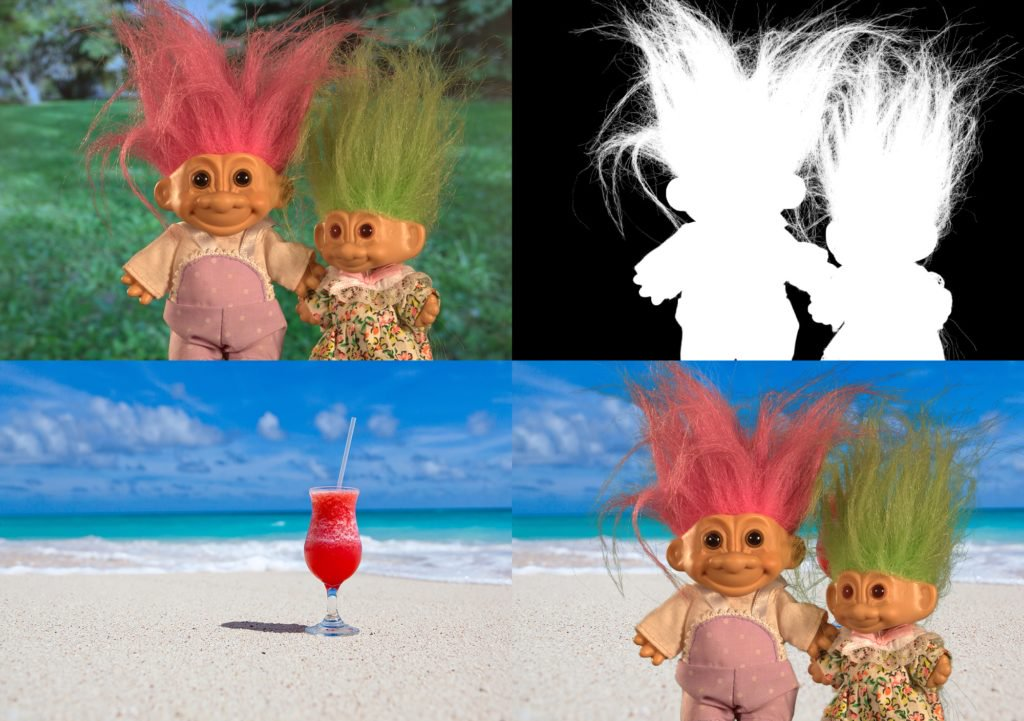

###### %%writefile test
## Practice 10 (Homework 3)
1. Input BGR images from webcam.
2. Use cv2.CascadeClassifier() to detect your face, mouth, and eyes.
3. Input BGRA images from files "mustache.png" and "hat.png"
4. Perform <b> Alpha Blending </b> to add mustache and hat on the right position and orientation of your face.
5. The overlaid mustache and hat should be translated, rotated, and scaled according the movement of your face. 
6. Show your output images.
7. Upload your Jupyter code file (*.ipynb)